# Macchine a vettori di supporto (SVM)
Le **macchine a vettori di supporto (Support Vector Machines - SVM)** sono un **modello lineare** di classificazione.<br>
Quello che questo algoritmo fa è trovare la retta che massimizza lo spazio tra le classi in un dataset, e lo fa utilizzando i *vettori di supporto* (in blu in figura).<br><br>
Maggiore sarà questa distanza, migliore sarà la capacità di generalizzazione del modello.
<img src="svm.png" width="300px" />
<br>
In questo notebook proveremo ad utilizzare le macchine a vettori di supporto per classificare le specie dei fiori all'interno dell'[Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris).
<br><br>
Importiamo le librerie necessarie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scripts.viz import plot_bounds

e carichiamo l'iris dataset all'interno di un DataFrame

In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal length","sepal width","petal length","petal width","class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Creiamo le Series per l'addestramento del modello

In [3]:
X = iris.drop("class",axis=1)
Y = iris["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

La colonna target **class** contiene delle variabili categoriche, eseguiamo l'encoding

In [4]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

e standardizziamo le features per train set e test set

In [5]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## SVM lineare con 2 features
Effettuiamo una classificazione utilizzando soltanto due features, in modo da poter visualizzare i decision boundary.

In [6]:
X2_train = X_train[:,:2]
X2_test = X_test[:,:2]

Adesso creiamo il nostro modello utilizzando la classe <span style="font-family: Monaco">LinearSVC</span>
 di sklearn.

In [7]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X2_train, Y_train)
print("ACCURACY con 2 proprietà: Train=%.4f Test=%.4f" % (svc.score(X2_train, Y_train), svc.score(X2_test,Y_test)))

ACCURACY con 2 proprietà: Train=0.8286 Test=0.6889


Utilizziamo la funzione <span style="font-family: Monaco">plot_bounds</span>
, definita all'interno del file <span style="font-family: Monaco">viz.py</span>
, per visualizzare il decision boundary.

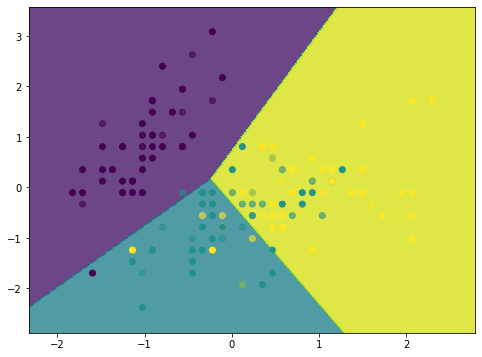

In [8]:
plot_bounds((X2_train,X2_test),(Y_train,Y_test),svc)

Il risultato è scarso e presenta overfitting, non perdiamo tempo ad ottimizzarlo e proviamo adesso con tutte le proprietà.

## SVM lineare con tutte le tutte le features
Creiamo adesso un modello utilizzando tutte le features presenti all'interno del nostro dataset.

In [9]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, Y_train)
print("ACCURACY con tutte le proprietà: Train=%.4f Test=%.4f" % (svc.score(X_train, Y_train), svc.score(X_test,Y_test)))

ACCURACY con tutte le proprietà: Train=0.9429 Test=0.9556


Il risultato è nettamente superiore

## PRO e CONTRO

#### PRO
* Maggior robustezza rispetto agli outliers

#### CONTRO
* Rimane un modello di classificazione **lineare**, con tutti i limiti del caso